<a href="https://colab.research.google.com/github/themestrre/Metodos-Numericos/blob/main/Programa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Carlos Eduardo Leite de Oliveira

**Matricula:** 242104345

# **MÉTODOS NUMÉRICOS EM CIÊNCIAS MECÂNICAS**

## Programa 1 - Sedimentação de uma esfera em um fluido viscoso

### Enunciado da tarefa

Baseado nessa contextualização, sua tarefa consiste em escrever um programa de computador (FORTRAN, C++ ou Python) que resolva o problema de sedimentaçãoo de uma esfera em baixo Reynolds na sua forma adimensional utilizando o método de Runge-Kutta de quarta ordem clássico para realizar as seguintes análises:




In [2]:
# Para todos os casos relacionados somente vamos utilizar essas duas biblioteca básicas
import numpy as np
import matplotlib.pyplot as plt

1.   Para o caso de $Re \to 0$ compare a solução analítica com a solução exata para diferentes valores de $St$;


In [3]:
# Função que define a EDO dv*/dt* = (1-v*)/St (Forma adimmensional)
def f(v, t, St):
    return (1 - v)/St

In [4]:
# Método de Runge-Kutta de quarta ordem
def runge_kutta_4(f, v0, t, St):
    n = len(t)
    v = np.zeros(n)
    v[0] = v0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(v[i], t[i], St)
        k2 = f(v[i] + 0.5*h*k1, t[i] + 0.5*h, St)
        k3 = f(v[i] + 0.5*h*k2, t[i] + 0.5*h, St)
        k4 = f(v[i] + h*k3, t[i] + h, St)
        v[i+1] = v[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return v

In [5]:
# Solução analítica v*(t*) = 1 - exp(-t*/St)
def solucao_analitica(t, St):
    return 1 - np.exp(-t/St)

In [6]:
# Função principal
def main():
    t_max = 5        # tempo adimensional máximo
    n_steps = 1000   # número de passos
    t = np.linspace(0, t_max, n_steps)
    v0 = 0           # condição inicial: v*(0) = 0

    # Valores de Stokes a comparar
    Stokes = [0.1, 0.5, 1, 5]

    plt.figure(figsize=(10, 6))
    for St in Stokes:
        v_rk4 = runge_kutta_4(f, v0, t, St)
        v_analitica = solucao_analitica(t, St)

        plt.plot(t, v_rk4, '--', label=f'RK4 - St={St}')
        plt.plot(t, v_analitica, '-', label=f'Analítica - St={St}')

    plt.xlabel('t* (tempo adimensional)')
    plt.ylabel('v*_z (velocidade adimensional)')
    plt.title('Sedimentação de uma Esfera - Comparação RK4 vs Analítica')
    #plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

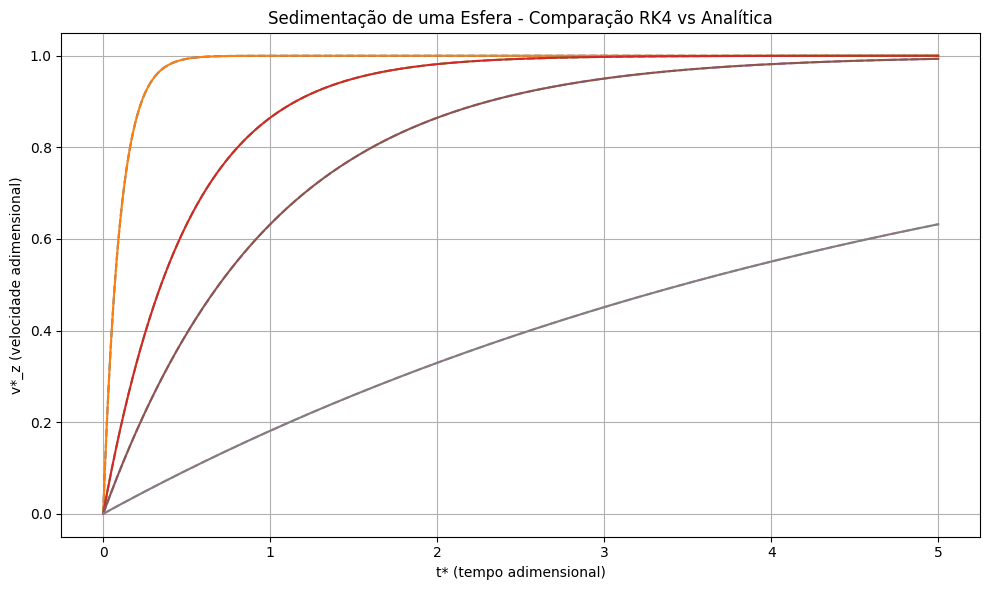

In [7]:
    main()

2.   Para um dado cenário varie o passo de tempo e mostre como o refinamento dessa quantidade afeta a qualidade da solução;


In [8]:
# Função principal para a resolução da questao 2
def main():
    St = 0.5          # valor fixo de Stokes
    t_max = 5         # tempo final
    v0 = 0            # condição inicial

    n_steps = 1000   # número de passos
    steps_list = [10, 50, 100, 500, 1000, 5000]  # refinamentos de passo de tempo
    erros = []

    plt.figure(figsize=(10, 6))

    for n_steps in steps_list:
        t = np.linspace(0, t_max, n_steps)
        v_rk4 = runge_kutta_4(f, v0, t, St)
        v_analitica = solucao_analitica(t, St)
        erro_max = np.max(np.abs(v_rk4 - v_analitica))
        erros.append(erro_max)

        plt.plot(t, v_rk4, label=f'n={n_steps} (erro={erro_max:.2e})')

    plt.plot(t, solucao_analitica(t, St), 'k--', label='Analítica (referência)', linewidth=2)
    plt.xlabel('t* (tempo adimensional)')
    plt.ylabel('v*_z (velocidade adimensional)')
    plt.title(f'Influência do passo de tempo na solução numérica (St={St})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot do erro vs número de passos
    plt.figure(figsize=(8, 5))
    plt.loglog(steps_list, erros, 'o-')
    plt.xlabel('Número de passos (n_steps)')
    plt.ylabel('Erro absoluto máximo')
    plt.title('Convergência do método RK4 com refinamento de tempo')
    plt.grid(True, which="both", ls='--')
    plt.tight_layout()
    plt.show()

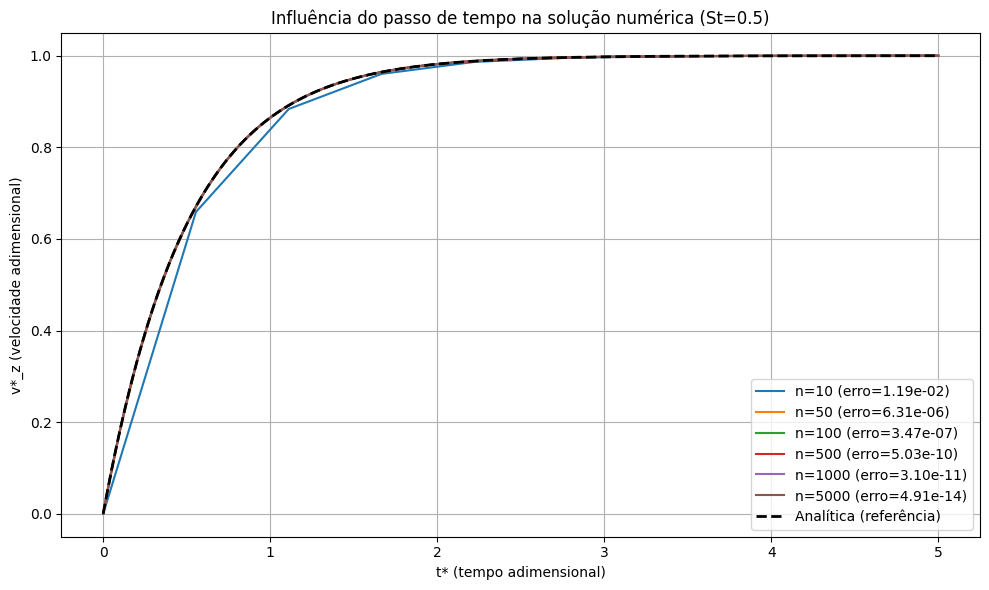

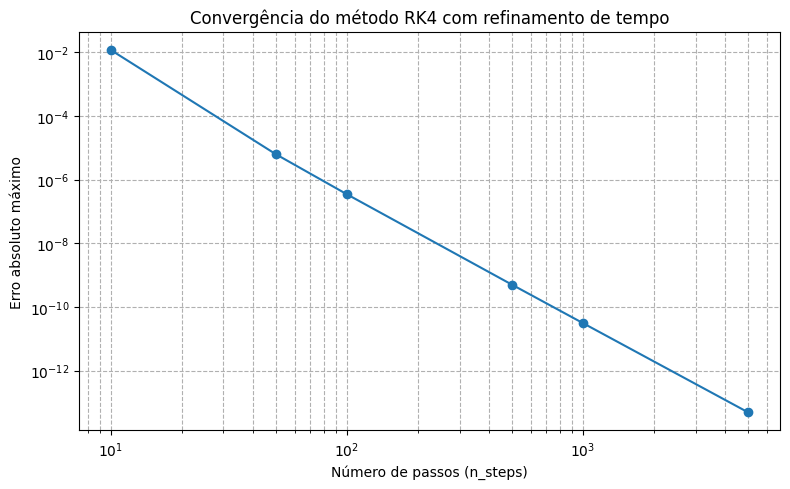

In [9]:
main()

3.   Para um pequeno efeito inercial no fluido ($Re \neq 0$) devemos adicionar uma força de arrasto quadrática ao movimento da esfera, de tal sorte que agora a equação governante (dimensional) do problema é dada por:

\begin{equation}
m_p \frac{dv_z}{dt} = -6\pi \eta a v_z - \frac{9}{4} \pi \rho_f a^2 v_z^2 + \frac{4}{3} \pi a^3 \Delta \rho g
\end{equation}

Para esse cenário, adimensionalize a equação do movimento da partícula e  mostre que a versão adimensional dessa equação possui além do número de Stokes uma dependência com o número de Reynolds de partícula $\text{Re}_s$ baseado na velocidade de Stokes de uma partícula isolada, dado por:

\begin{equation}
\text{Re}_s = \frac{\rho_f U_s a}{\eta}
\end{equation}


In [10]:
# Equação com arrasto linear + quadrático
def f_quadratic_drag(t, v, St, Re_s):
    return (1 - v - (3/8) * Re_s * v**2) / St

In [11]:
# Parâmetros
St = 0.5
Res_list = [0.01, 0.1, 1, 5, 10]  # Diferentes efeitos inerciais
dt = 0.01
tf = 10

In [13]:
# Método de Runge-Kutta de 4ª ordem adaptado
def runge_kutta_4_drag(f, v0, t0, tf, dt, St, Re_s):
    N = int((tf - t0) / dt)
    t_vals = np.linspace(t0, tf, N+1)
    v_vals = np.zeros(N+1)
    v_vals[0] = v0

    for i in range(N):
        t = t_vals[i]
        v = v_vals[i]
        k1 = f(t, v, St, Re_s)
        k2 = f(t + dt/2, v + dt*k1/2, St, Re_s)
        k3 = f(t + dt/2, v + dt*k2/2, St, Re_s)
        k4 = f(t + dt, v + dt*k3, St, Re_s)
        v_vals[i+1] = v + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

    return t_vals, v_vals

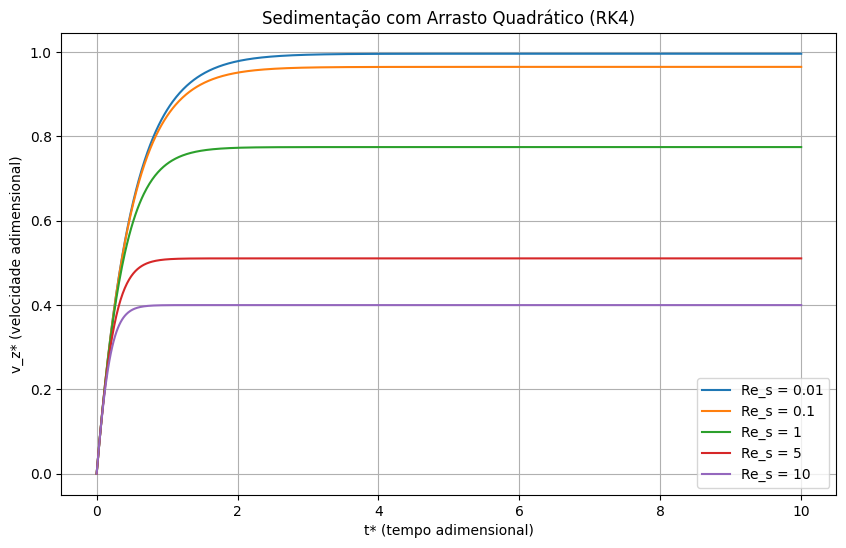

In [16]:
# Plotando
plt.figure(figsize=(10, 6))
for Re_s in Res_list:
    t, v = runge_kutta_4_drag(f_quadratic_drag, v0=0, t0=0, tf=tf, dt=dt, St=St, Re_s=Re_s)
    plt.plot(t, v, label=f'Re_s = {Re_s}')

plt.xlabel('t* (tempo adimensional)')
plt.ylabel('v_z* (velocidade adimensional)')
plt.title('Sedimentação com Arrasto Quadrático (RK4)')
plt.legend()
plt.grid(True)
#plt.show()
main()


4.   Para este novo cenário, valide seu código com base na solução exata para o problema, que pode ser encontrada no artigo trabalhado nas aulas iniciais do curso [1];


In [21]:
# Solução exata segundo Sobral et al. (Eq. 22)
def vt_exact(Res):
    return (-8 + np.sqrt(64 + 96 * Res)) / (6 * Res)

In [22]:
def analytical_solution_sobral(t, Res):
    eps = (3 / 8) * Res
    vt = vt_exact(Res)
    A = 1 + 0.5 * vt
    num = (1 + 2 * eps * vt)
    denom = (1 - eps * vt) * np.exp((1 + 2 * eps * vt) * t / A) - eps * vt
    return vt / (1 + num / denom)

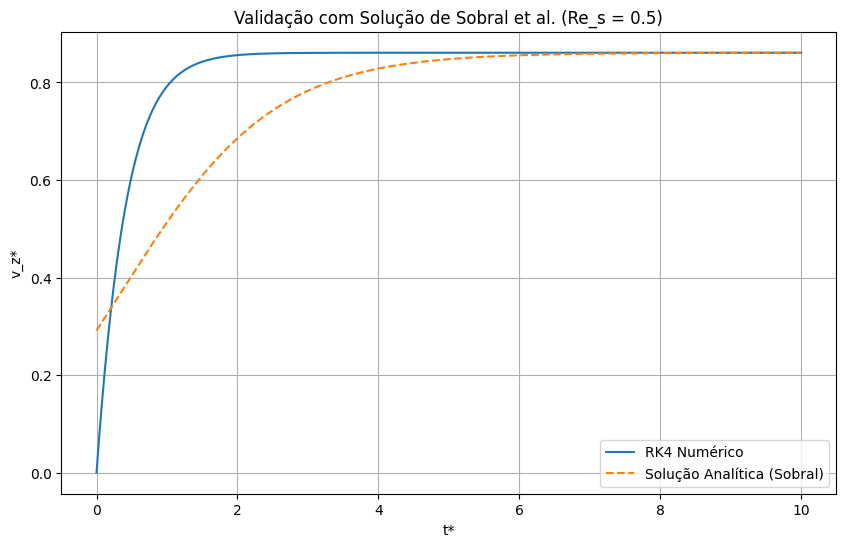

In [23]:
# Comparação visual
Res = 0.5  # exemplo
St = 0.5
dt = 0.01
tf = 10

t_rk, v_rk = runge_kutta_4_drag(f_quadratic_drag, v0=0, t0=0, tf=tf, dt=dt, St=St, Re_s=Res)
v_exact = analytical_solution_sobral(t_rk, Res)

plt.figure(figsize=(10, 6))
plt.plot(t_rk, v_rk, label='RK4 Numérico', color='tab:blue')
plt.plot(t_rk, v_exact, '--', label='Solução Analítica (Sobral)', color='tab:orange')
plt.xlabel('t*')
plt.ylabel('v_z*')
plt.title(f'Validação com Solução de Sobral et al. (Re_s = {Res})')
plt.grid(True)
plt.legend()
plt.show()



5.   Finalmente, plote o comportamento da solução numérica para diferentes valores de $\text{Re}_s$ e mostre como a solução numérica se desvia do limite assintótico em que $Re \to 0$.

In [18]:
# Função analítica para Re_s → 0
def analytical_stokes_limit(t, St):
    return 1 - np.exp(-t / St)

In [19]:
# Parâmetros de simulação
St = 0.5
dt = 0.01
tf = 10
t_vals = np.arange(0, tf + dt, dt)

# Valores de Re_s para testar
Res_list = [0, 0.01, 0.1, 0.5, 1, 5]


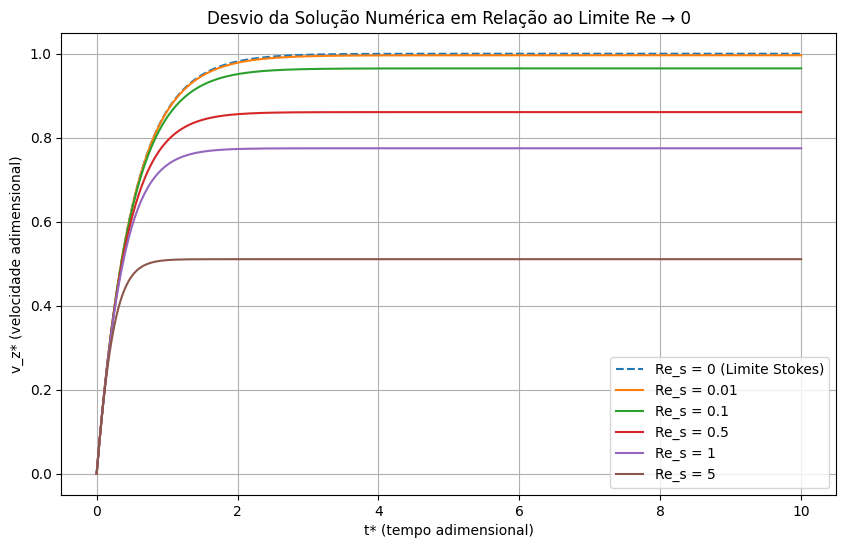

In [20]:
plt.figure(figsize=(10, 6))

for Res in Res_list:
    if Res == 0:
        v = analytical_stokes_limit(t_vals, St)
        label = "Re_s = 0 (Limite Stokes)"
        style = "--"
    else:
        _, v = runge_kutta_4_drag(f_quadratic_drag, v0=0, t0=0, tf=tf, dt=dt, St=St, Re_s=Res)
        label = f"Re_s = {Res}"
        style = "-"
    plt.plot(t_vals, v, style, label=label)

plt.xlabel("t* (tempo adimensional)")
plt.ylabel("v_z* (velocidade adimensional)")
plt.title("Desvio da Solução Numérica em Relação ao Limite Re → 0")
plt.grid(True)
plt.legend()
plt.show()